<a href="https://colab.research.google.com/github/FarLive/FrontEnd-LaunchX/blob/main/AlgoritmoG%C3%A9neticoLom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo Génetico Para funciones reales

## Importamos las librerias que vamos a utilizar

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Definimos las funciones a optimizar

---

In [ ]:
# Función de esfera
def f1( x ):
  n = len( x )
  return sum( [x[i] ** 2 for i in range(n)] )

# Función Rosenbrook
def f2( x ):
  n = len( x )
  return sum( 100 * ( x[i] ** 2 - x[i+1] ) ** 2 + ( 1 - x[i] ) ** 2 for i in range(n - 1) )

# Función de Ackley 
def f3( x ):
  n = len(x)
  sum_sq = sum([xi**2 for xi in x])  
  sum_cos = sum([np.cos(2*np.pi*xi) for xi in x])
  return -20*np.exp(-0.2*np.sqrt(sum_sq/n)) - np.exp(sum_cos/n) + 20 + np.e

# Graficar las funciones a optimizar

---

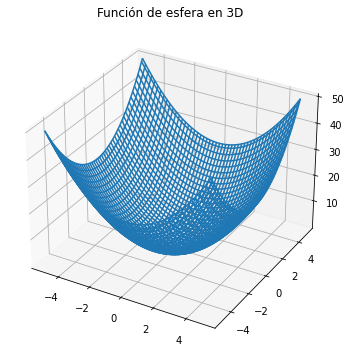

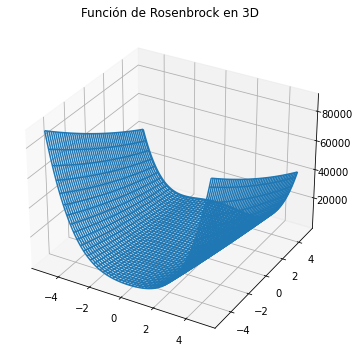

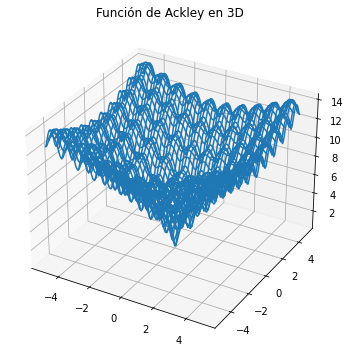

In [ ]:
# Crear un conjunto de datos
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z1 = f1(np.array([X, Y]))
Z2 = f2(np.array([X, Y]))
Z3 = f3(np.array([X, Y]))

# Crear tres figuras
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111, projection='3d')
fig3 = plt.figure(figsize=(8, 6))
ax3 = fig3.add_subplot(111, projection='3d')

# Graficar las superficies en cada figura
ax1.plot_wireframe(X, Y, Z1, cmap='viridis')
ax2.plot_wireframe(X, Y, Z2, cmap='plasma')
ax3.plot_wireframe(X, Y, Z3, cmap='inferno')

# Etiquetas y título para cada figura
ax1.set_title('Función de esfera en 3D')

ax2.set_title('Función de Rosenbrock en 3D')

ax3.set_title('Función de Ackley en 3D')

# Mostrar las gráficas
plt.show()

# Creamos las funciones para códificar y decodificar la representación binaria 

---

In [ ]:
def codificar( x, limInf, limSup, decimales ):
    # Obtener la cantidad de bits necesarios para representar el rango de valores especificado por los límites inferior y superior, tomando en cuenta la cantidad de decimales especificados.
    cantidad_bits = math.ceil(math.log2(limSup * 10 ** decimales - limInf * 10 ** decimales))
    
    # Convertir el valor x a su representación en binario.
    valor_binario = "{0:b}".format(int((x - limInf) * 10 ** decimales))
    
    # Completar con ceros a la izquierda si es necesario para que la longitud sea igual a la cantidad de bits necesarios.
    valor_binario_completo = valor_binario.zfill( cantidad_bits )
    
    return valor_binario_completo

def decodificar( binaryValue, limInf, decimales ):
  #Transformar de forma tradicional el valor
  bin2decimal = int( binaryValue, 2 )
  decimal_value = ( bin2decimal + ( limInf * 10 ** decimales ) ) / ( 10 ** decimales )
  return decimal_value

bin = codificar( 0.5, 0.5, 5.0, 1 )
print(bin)
decodificar( bin, 0.5, 1 )

000000


0.5

# Función de evaluacion

---

In [ ]:
def evaluacion( cromosoma, funcion, limInf, decimales ):
  # Decodificamos
  val_evaluar = decodificar( cromosoma, limInf, decimales )
  # Evaluamos
  val_evaluado = funcion( [val_evaluar] )
  return val_evaluado

# Estrategia de selección de padres : Estocastico sin reemplazo

---

In [ ]:
def flip( decimal ):
  return np.random.choice(np.arange(0, 2), p=[ 1 - decimal ,decimal ])

def sobrante_estocastico_sin_reemplazo( poblacion ):
  # Obtener promedio
  promedio = sum( cromosoma.fitness for cromosoma in poblacion ) / len( poblacion )

  decimales = []
  
  for cromosoma in poblacion: 
    # Obtenemos la esperanzaa de cada cromosoma
    cromosoma.esperanza = cromosoma.fitness / promedio
    # Obtenemos los decimales
    
    decimales.append( abs( int( cromosoma.esperanza ) - cromosoma.esperanza ) )

  padres_indices = []

  print( decimales )
  
  # Tomar la decisión de que padres seleccionar mediante el flip
  for i in range( len( decimales ) ):
    decision = flip( decimales[i] )
    if decision == 1: padres_indices.append( i )

  return padres_indices

# Estrategia de sobrevivientes : Torneo(binario determinista o probabilista)

---



# Operadores de cruza

---

In [ ]:
def cruza_uniforme( padre1, padre2, porcentaje_cruza ):
  hijo1 = ''
  # Recorrer Padres
  for i in range( len( padre1 ) ):
    decision = flip( porcentaje_cruza )
    hijo1 += padre1[i] if decision == 1 else padre2[i]

  hijo2 = hijo1.replace('0', 'x').replace('1', '0').replace('x', '1')
  
  return hijo1, hijo2

def cruza_dos_puntos(padre1, padre2):
    punto1 = np.random.randint(1, len(padre1)-1) # Elegir el primer punto de cruza
    punto2 = np.random.randint(punto1, len(padre1)) # Elegir el segundo punto de cruza

    hijo1 = padre1[:punto1] + padre2[punto1:punto2] + padre1[punto2:]
    hijo2 = padre2[:punto1] + padre1[punto1:punto2] + padre2[punto2:]

    return hijo1, hijo2



# Operador Mutacion

---

In [ ]:
def mutacion( poblacion, porcentaje_mutacion ):
  # Recorremos la poblacion
  for cromosoma in poblacion:
    #Mutamos el cromosoma
    copia = ''
    for gen in cromosoma.cromosoma:
      decision = flip( porcentaje_mutacion )
      copia += gen.replace('0', 'x').replace('1', '0').replace('x', '1') if decision == 1 else gen
    cromosoma.cromosoma = copia
  
  return poblacion

# Reparar al individuo

---

In [ ]:
def reparar_individuo( poblacion, limSup, limInf, decimales ):
  # Recorremos la población
  for cromosoma in poblacion:
    #Evaluar que el individuo no se pase del limite
    valor_decimal = decodificar( cromosoma, limInf, decimales )
    if( valor_decimal > limSup ) : 
      # Reparar al individuo
      valor_decimal = limSup
      valor_reparado = codificar( valor_decimal, limSup, limInf, decimales )
      cromosoma = valor_reparado
  
  return poblacion

# Definimos la clase cromosoma

---

In [ ]:
class Cromosoma:
    def __init__(self, cromosoma, fitness=0):
        self.cromosoma = cromosoma
        self.fitness = fitness
        self.esperanza = 0

poblacion = [ Cromosoma( '110100', 220 ), Cromosoma( '011010', 140 ), Cromosoma( '111001', 315 ), Cromosoma( '001101', 42 ) ]

# sobrante_estocastico_sin_reemplazo( poblacion )

# Genetico ensamblado

---

In [ ]:
# Definir los límites inferior y superior para los valores de los cromosomas
limite_inferior = -5.12
limite_superior = 5.12

# Crear una población de n cromosomas aleatorios
cromosomas = []
for i in range(20):
    # Crear un cromosoma con dos valores aleatorios entre los límites inferior y superior
    cromosoma = np.random.uniform(limite_inferior, limite_superior)
    cromosomas.append(cromosoma)

cromosomas_codificados = [ codificar( cromosoma, limite_inferior, limite_superior, 4 ) for cromosoma in cromosomas ]
print( cromosomas_codificados )

poblacion = [ Cromosoma( cromosoma_codificado, evaluacion( cromosoma_codificado, f1, limite_inferior, 4 ) ) for cromosoma_codificado in cromosomas_codificados ]

eval_poblacion = sum( evaluacion( cromosoma.cromosoma, f1, limite_inferior, 4 ) for cromosoma in poblacion )

print( eval_poblacion )

['01100100010110111', '01000001010011101', '10001010111101100', '10101111110010100', '01001000010011000', '00001110111011111', '10011101011010100', '01010101111011100', '01100010011011101', '01000100100100100', '00110100000111101', '01100100010111100', '00010000011101111', '00111101111011111', '00011111110101101', '01101000010111010', '10101010010101001', '01101100101000101', '00001101111011101', '00010000110100110']
145.97521363
